### Hilbert DDPM for 1D toy example

In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from util import get_V_and_A,get_x_0_for_1D_DDPM,gp_sampler,np2torch
from ddpm import get_ddpm_constants,plot_ddpm_constants,ddpm_train_wrapper
from model import DenoisingDenseUNetClass
np.set_printoptions(precision=2)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rc('xtick',labelsize=5); plt.rc('ytick',labelsize=5)
print ("Ready.")

Ready.


### Diffusion constants

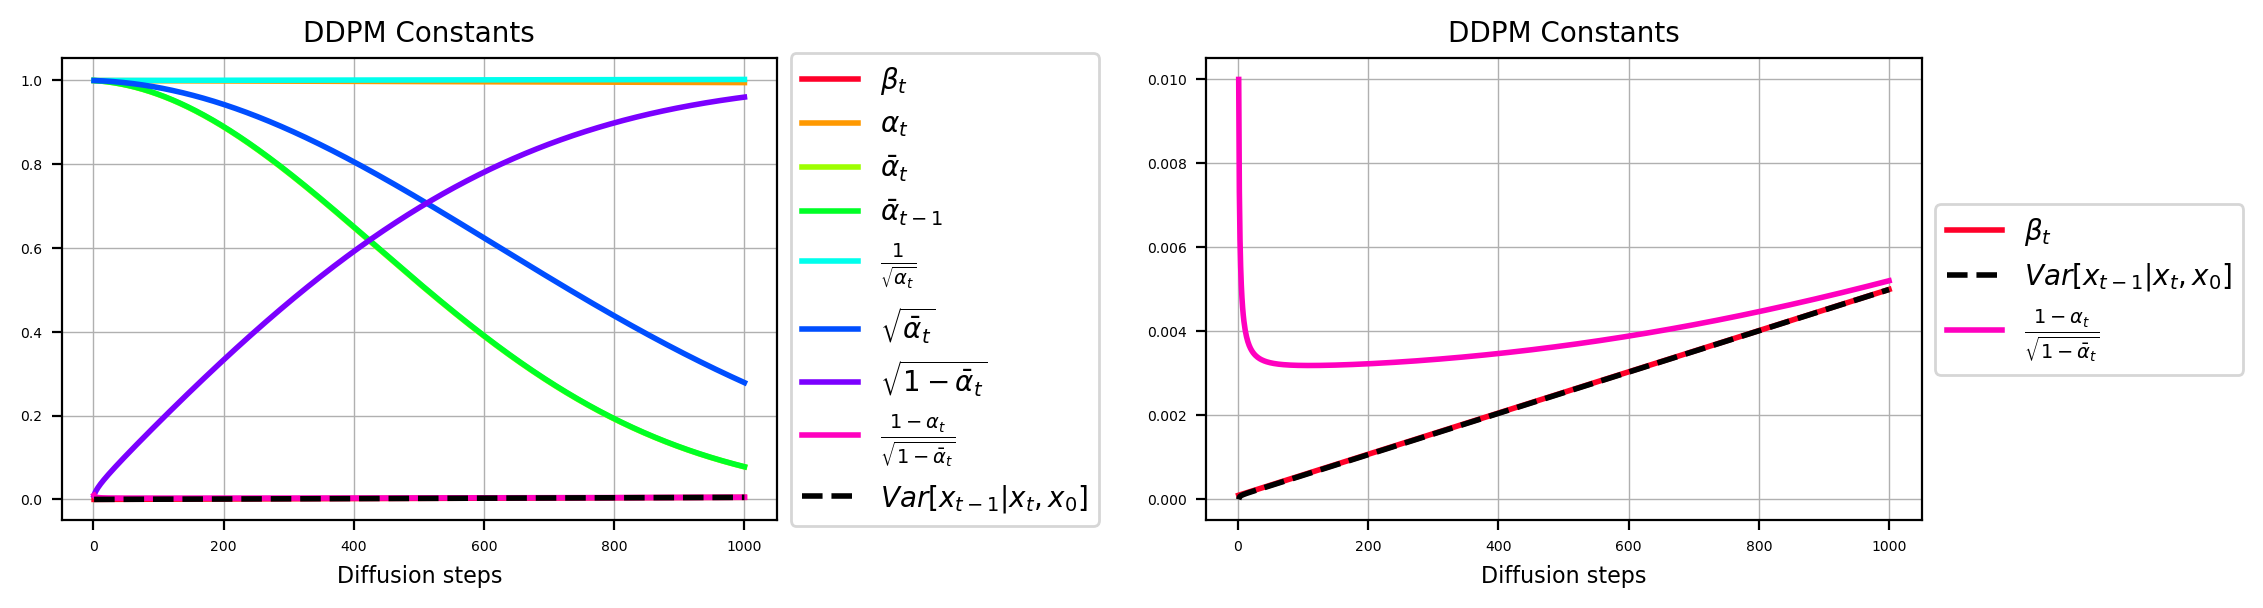

In [2]:
# Smaller `beta_end` tends to show better performances
dc = get_ddpm_constants(beta_start=1e-4,beta_end=5e-3,diffusion_step=1000)
plot_ddpm_constants(dc,figsize=(12,3))

### Commmon hyper-parameters

In [3]:
BATCH_SIZE,D,L = 128,1,100
base_lr,MAX_ITER = 1e-3,50000
actv = nn.ReLU() # nn.GELU(), nn.ReLU()
l1_w,l2_w,huber_w,smt_l1_w = 1.0,1.0,0.0,0.0
device = 'cpu' # cpu / mps
print ("Ready.")

Ready.


### Training data

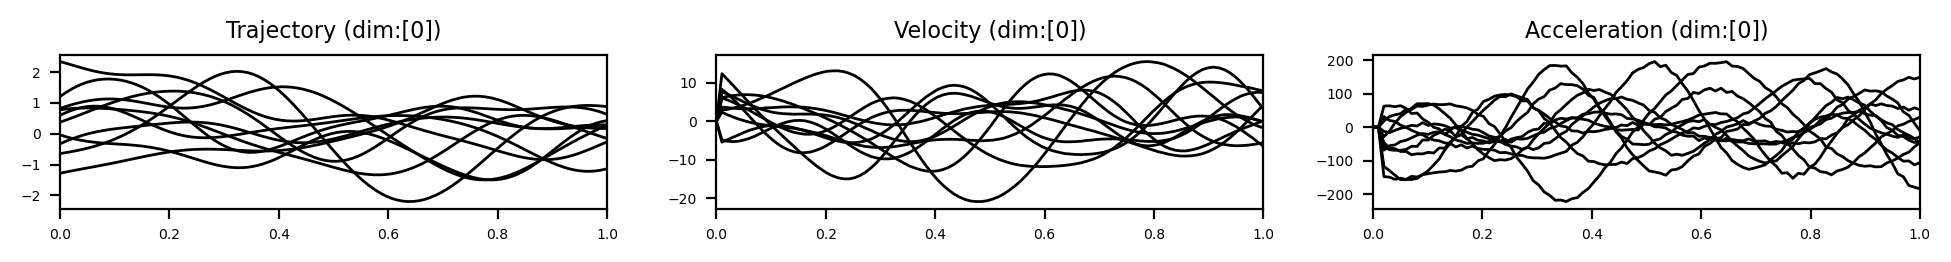

Ready.


In [4]:
times = np.linspace(start=0.0,stop=1.0,num=L).reshape((-1,1)) # [L x 1]
x_0,V,A = get_x_0_for_1D_DDPM(times,D=1,M=10,USE_SINGLE_TRAJECTORY=False,device='cpu')
print ("Ready.")

### Diffusion DDPM 

[0/50000][0.00%] loss:[2.156]
  [l1]:[0.881]
  [l2]:[1.224]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.051]


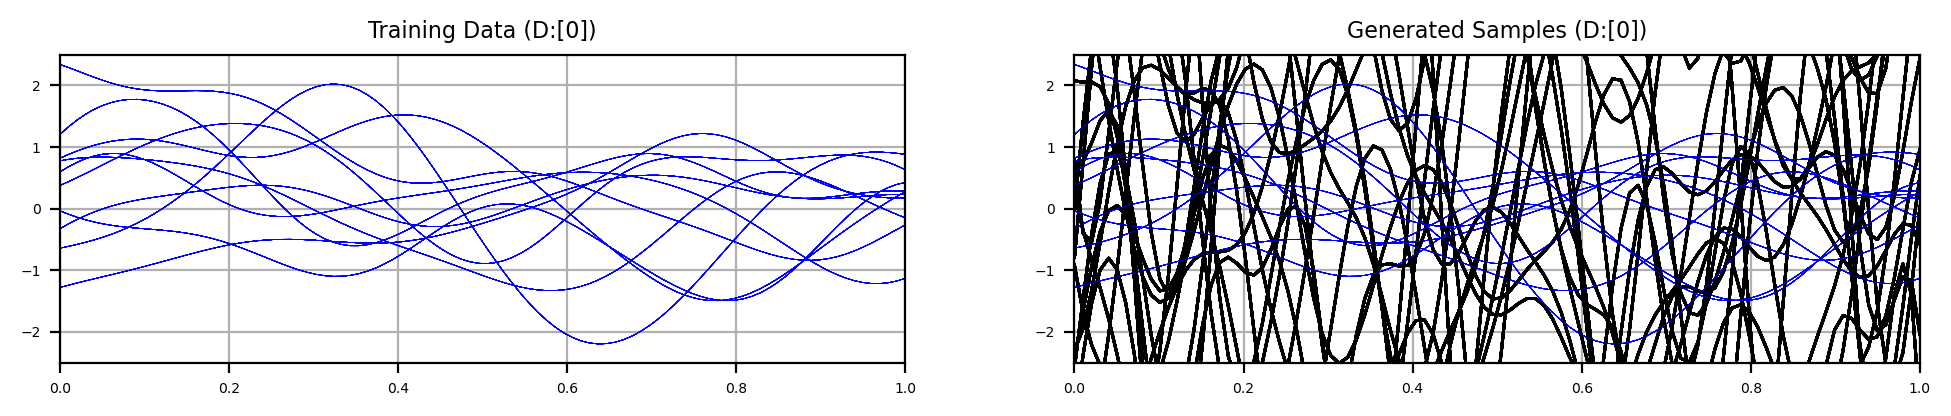

[2500/50000][5.00%] loss:[0.387]
  [l1]:[0.254]
  [l2]:[0.126]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]
[5000/50000][10.00%] loss:[0.473]
  [l1]:[0.290]
  [l2]:[0.175]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]


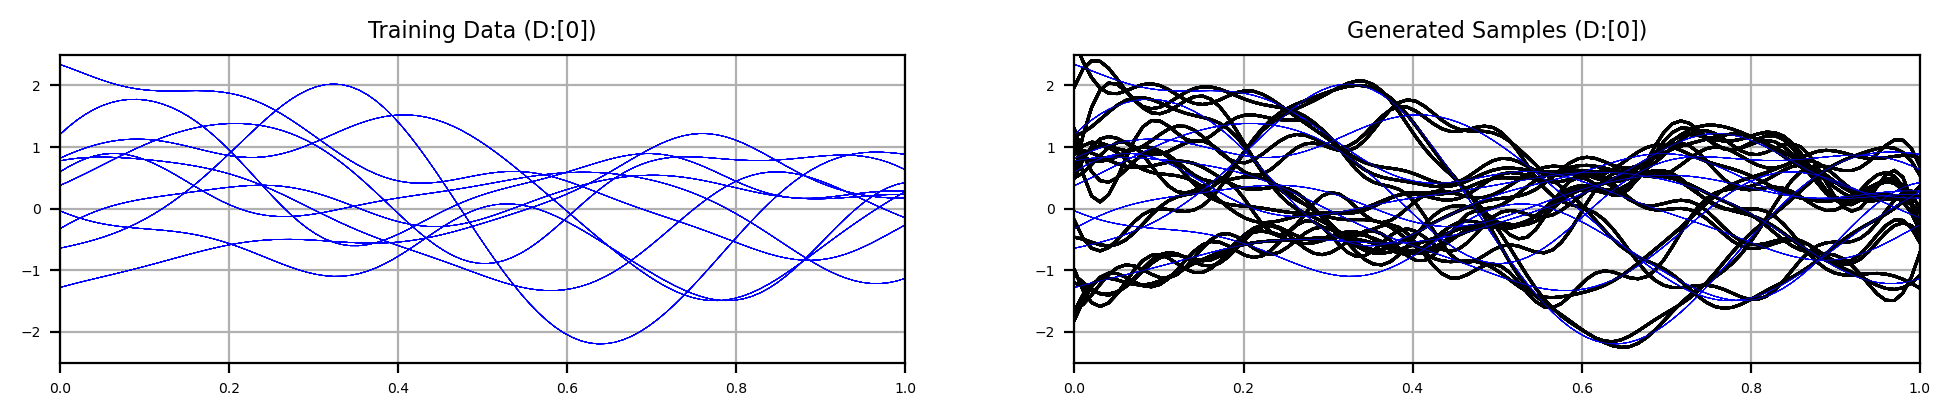

[7500/50000][15.00%] loss:[0.403]
  [l1]:[0.261]
  [l2]:[0.134]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]
[10000/50000][20.00%] loss:[0.506]
  [l1]:[0.298]
  [l2]:[0.201]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]


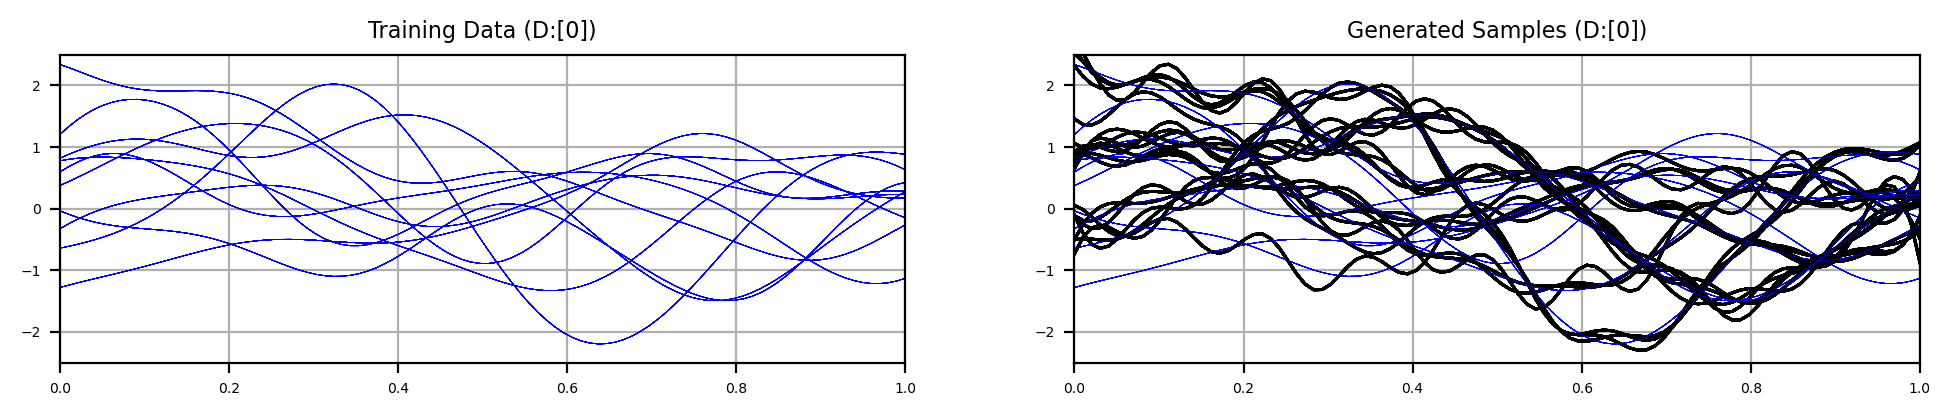

[12500/50000][25.00%] loss:[0.426]
  [l1]:[0.261]
  [l2]:[0.158]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]
[15000/50000][30.00%] loss:[0.381]
  [l1]:[0.243]
  [l2]:[0.131]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]


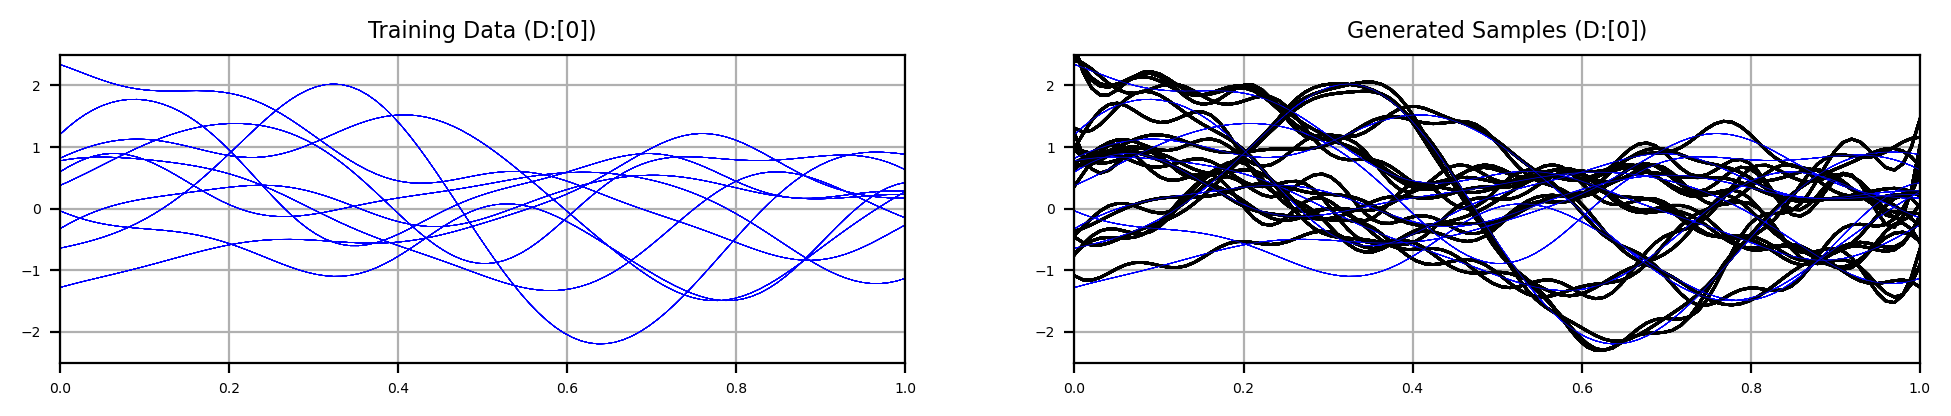

[17500/50000][35.00%] loss:[0.459]
  [l1]:[0.273]
  [l2]:[0.179]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]
[20000/50000][40.00%] loss:[0.381]
  [l1]:[0.242]
  [l2]:[0.132]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]


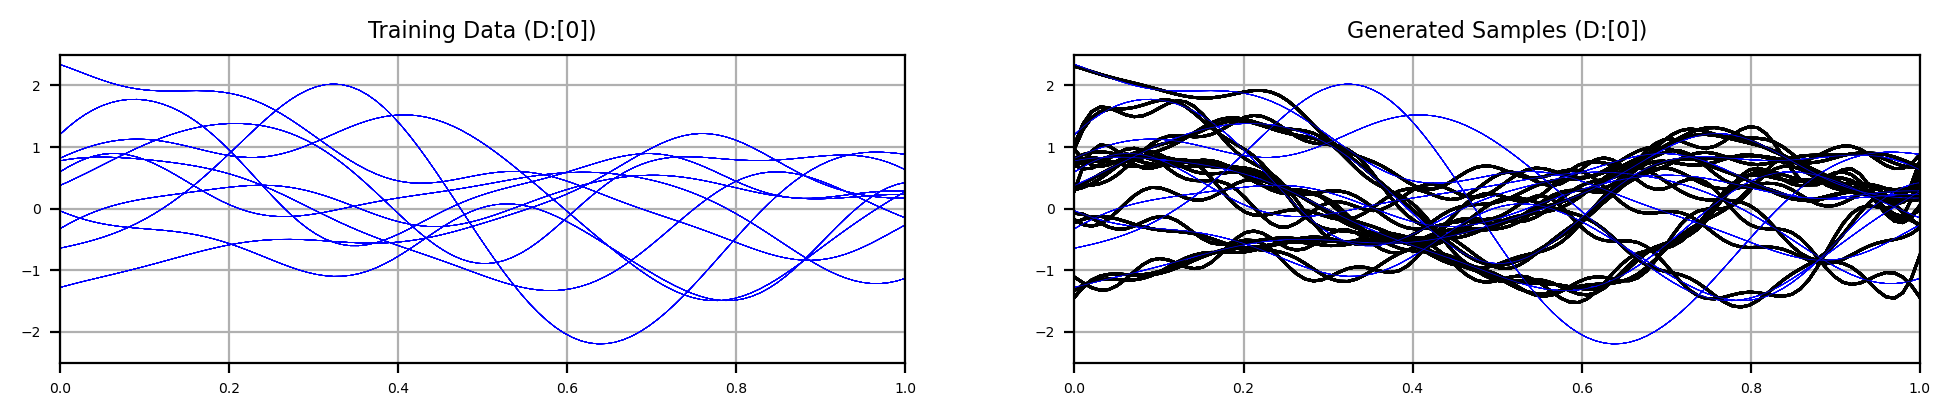

[22500/50000][45.00%] loss:[0.368]
  [l1]:[0.238]
  [l2]:[0.123]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]
[25000/50000][50.00%] loss:[0.426]
  [l1]:[0.263]
  [l2]:[0.156]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.006]


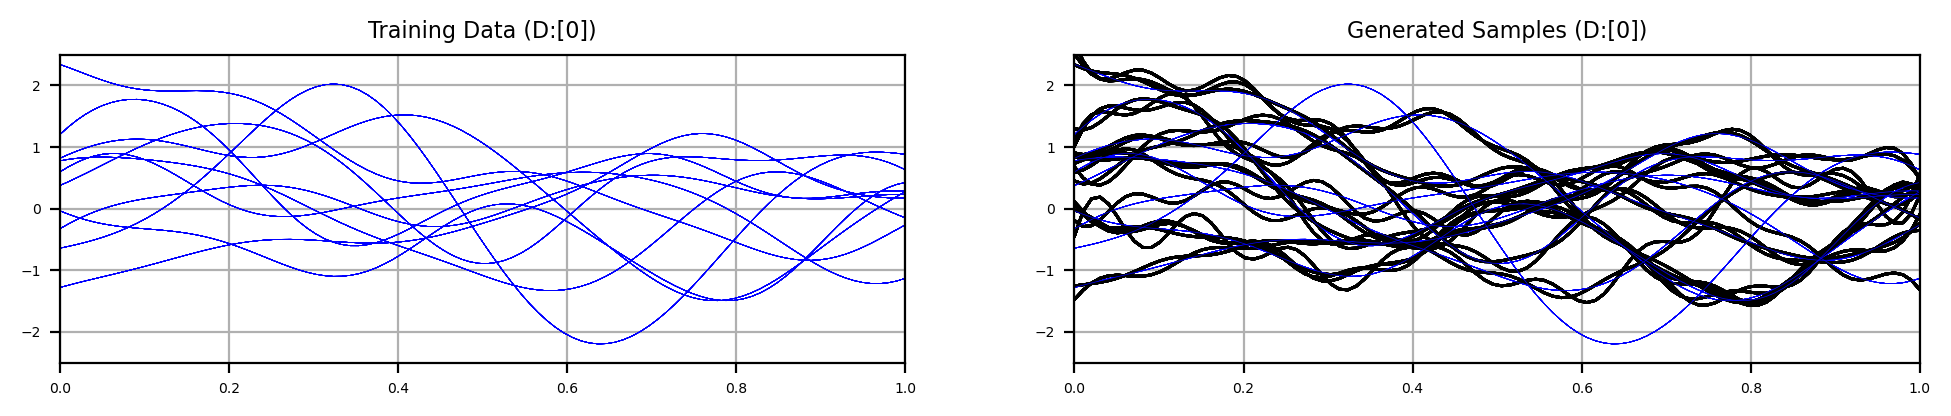

[27500/50000][55.00%] loss:[0.399]
  [l1]:[0.244]
  [l2]:[0.148]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]
[30000/50000][60.00%] loss:[0.345]
  [l1]:[0.221]
  [l2]:[0.117]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]


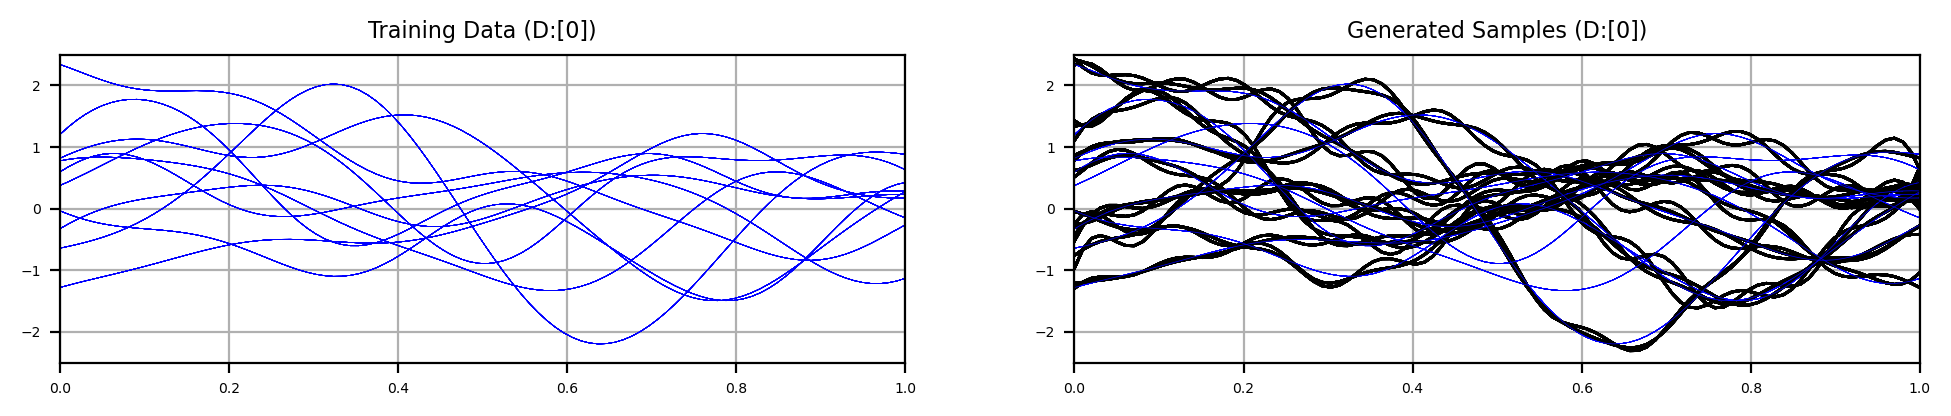

[32500/50000][65.00%] loss:[0.360]
  [l1]:[0.238]
  [l2]:[0.115]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.006]
[35000/50000][70.00%] loss:[0.387]
  [l1]:[0.244]
  [l2]:[0.137]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.006]


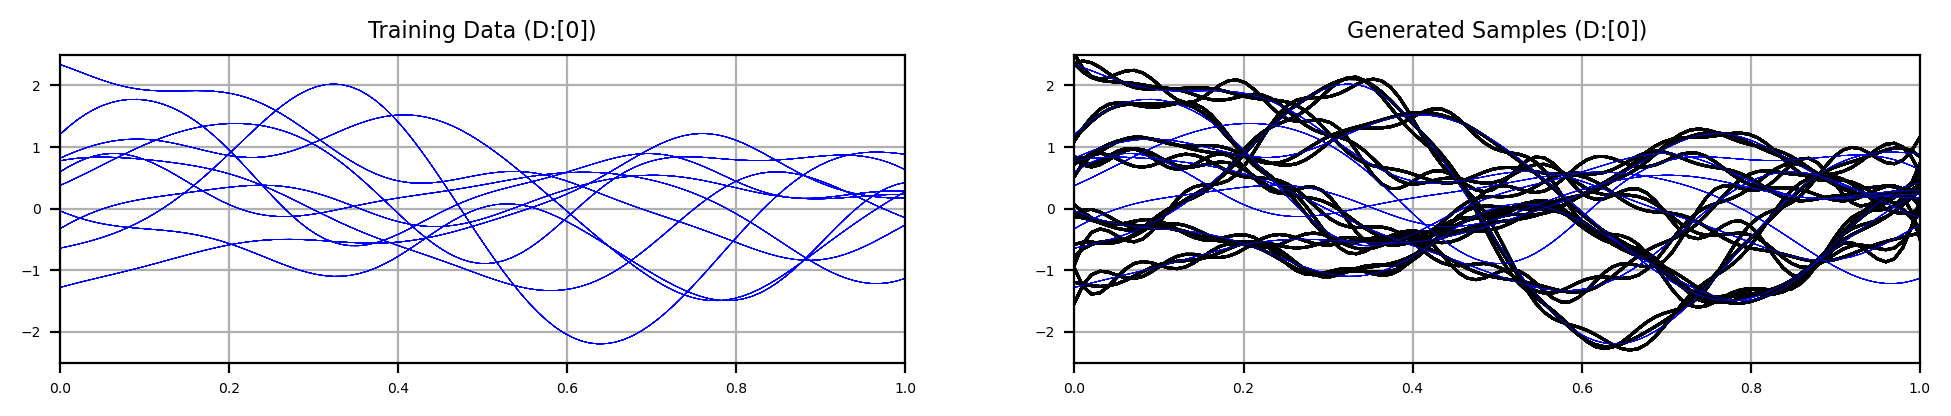

[37500/50000][75.00%] loss:[0.347]
  [l1]:[0.227]
  [l2]:[0.114]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.006]
[40000/50000][80.00%] loss:[0.341]
  [l1]:[0.215]
  [l2]:[0.119]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]


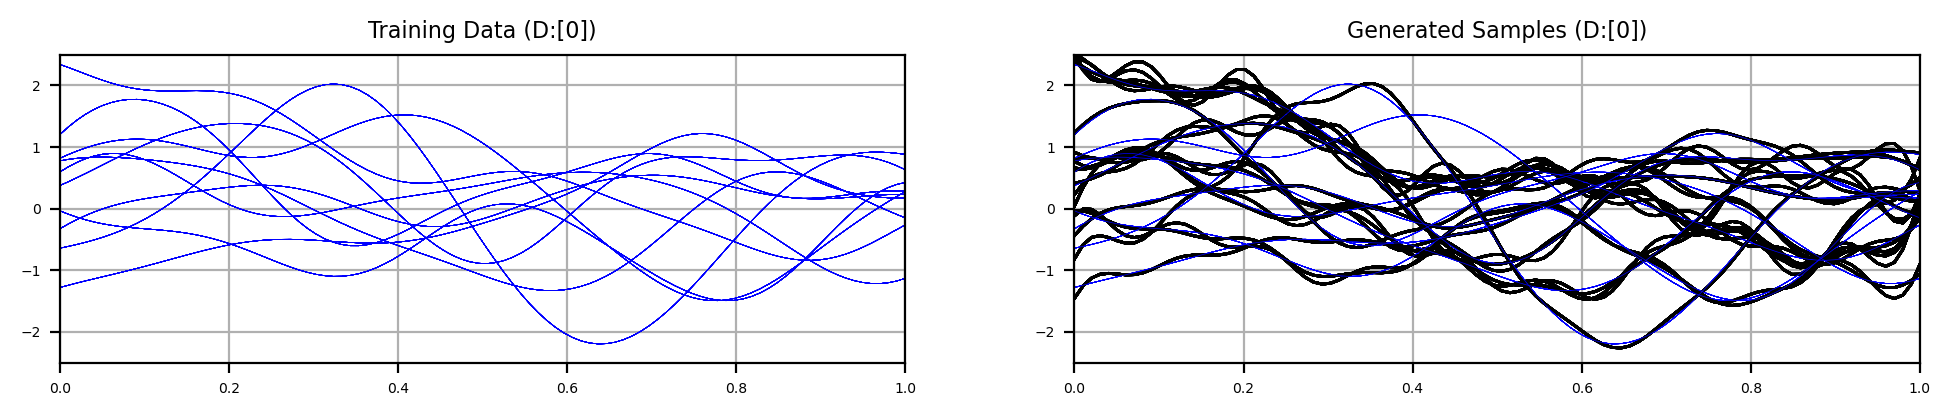

[42500/50000][85.00%] loss:[0.374]
  [l1]:[0.236]
  [l2]:[0.131]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]
[45000/50000][90.00%] loss:[0.383]
  [l1]:[0.241]
  [l2]:[0.136]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.006]


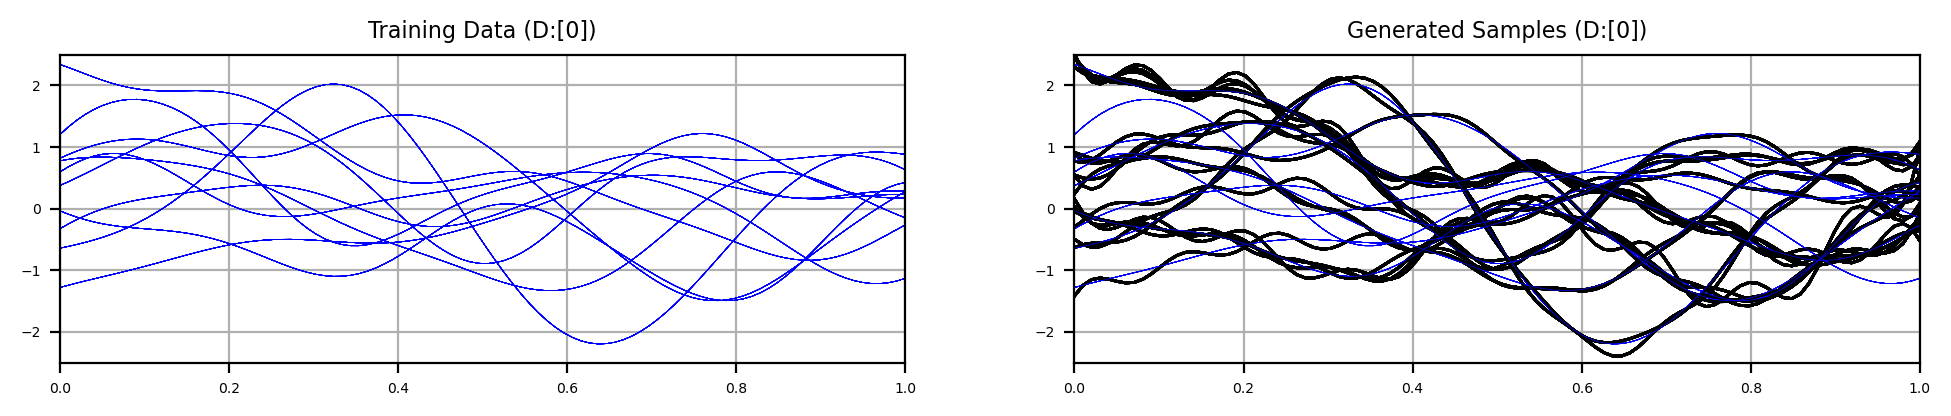

[47500/50000][95.00%] loss:[0.319]
  [l1]:[0.212]
  [l2]:[0.101]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.006]
[49999/50000][100.00%] loss:[0.410]
  [l1]:[0.259]
  [l2]:[0.144]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]


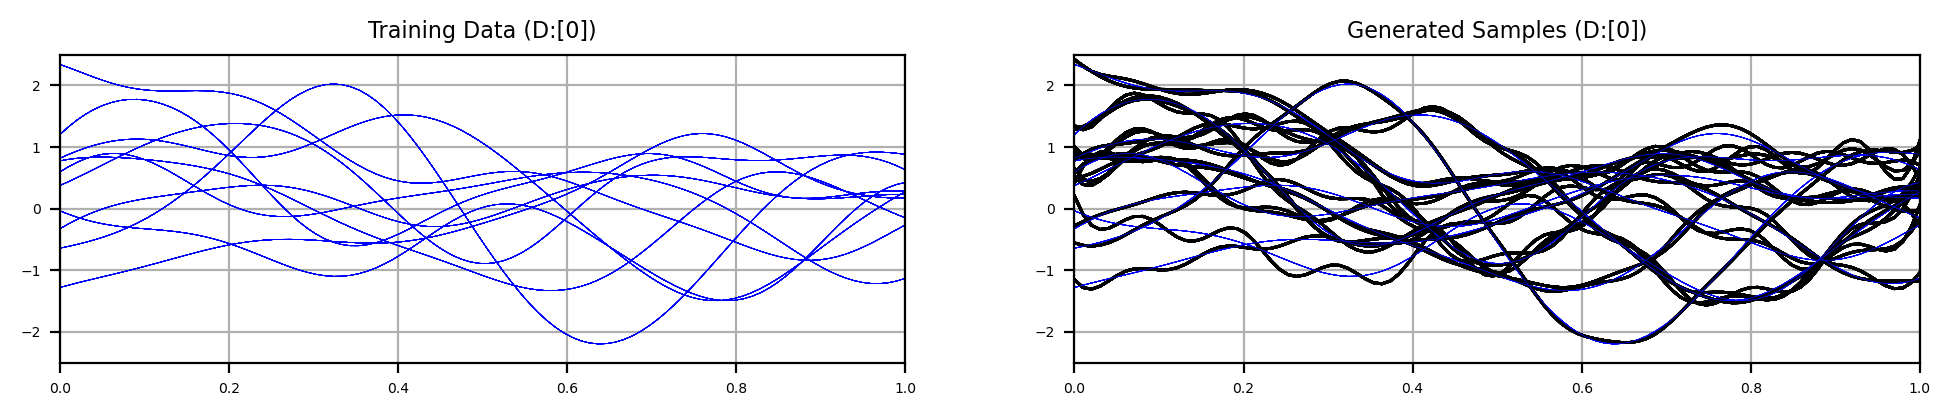

Done.


In [5]:
ddpm_train_wrapper(
    times,x_0,dc,actv=actv,
    hyp_len_forward=0.1,hyp_len_projection=0.1,hyp_sig2w=1e-6,
    n_sample=20,base_lr=base_lr,MAX_ITER=MAX_ITER,BATCH_SIZE=BATCH_SIZE,
    l1_w=l1_w,l2_w=l2_w,huber_w=huber_w,smt_l1_w=smt_l1_w,
    A=A,V=V,vel_w=1e-6,acc_w=1e-6,
    RKHS_PROJECTION_EACH_X_T=True,device='cpu')
print ("Done.")

### Baseline

[0/50000][0.00%] loss:[3.071]
  [l1]:[1.095]
  [l2]:[1.976]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


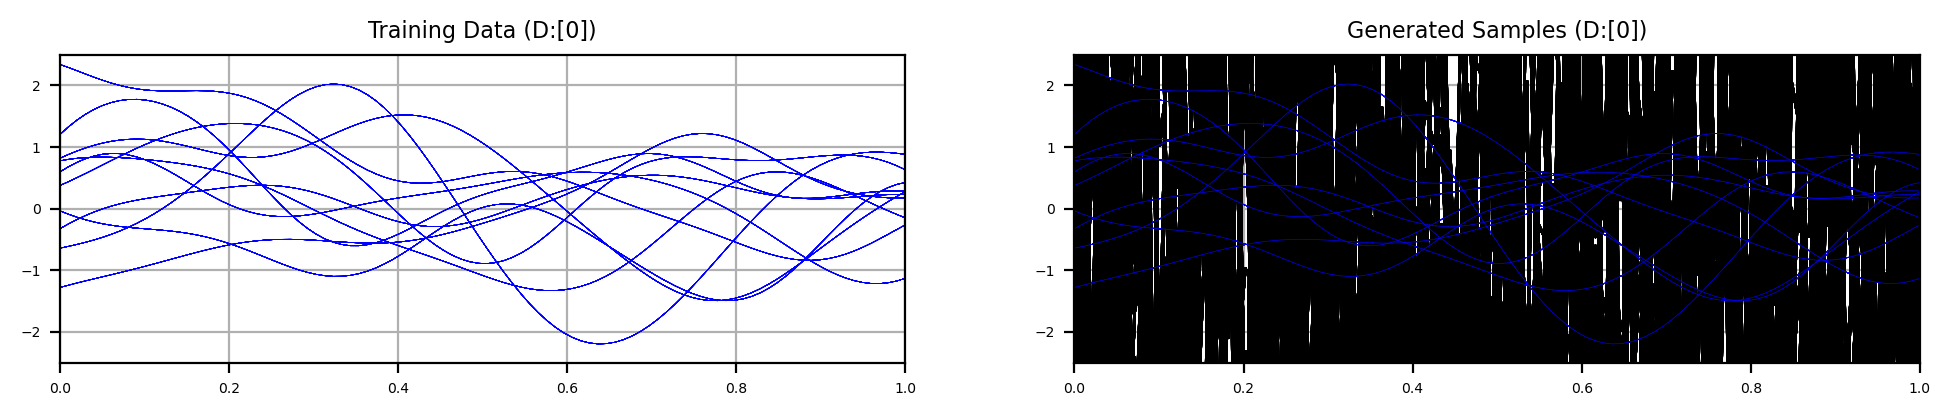

[2500/50000][5.00%] loss:[0.471]
  [l1]:[0.287]
  [l2]:[0.185]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[5000/50000][10.00%] loss:[0.440]
  [l1]:[0.271]
  [l2]:[0.169]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


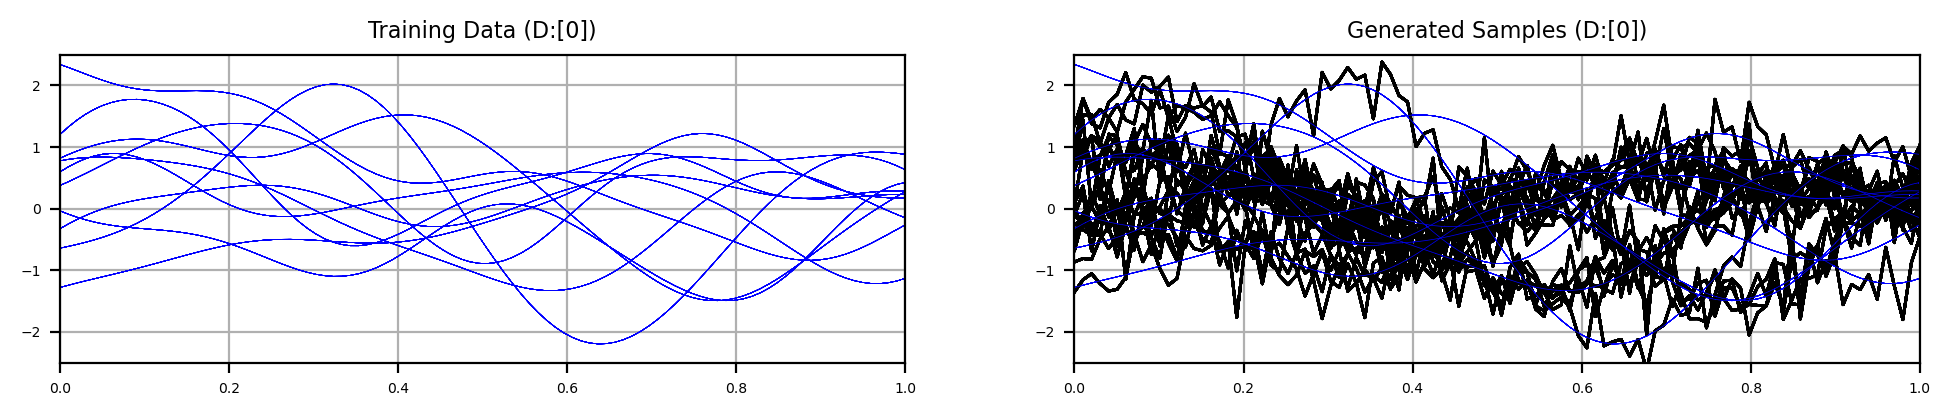

[7500/50000][15.00%] loss:[0.480]
  [l1]:[0.293]
  [l2]:[0.186]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[10000/50000][20.00%] loss:[0.486]
  [l1]:[0.294]
  [l2]:[0.192]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


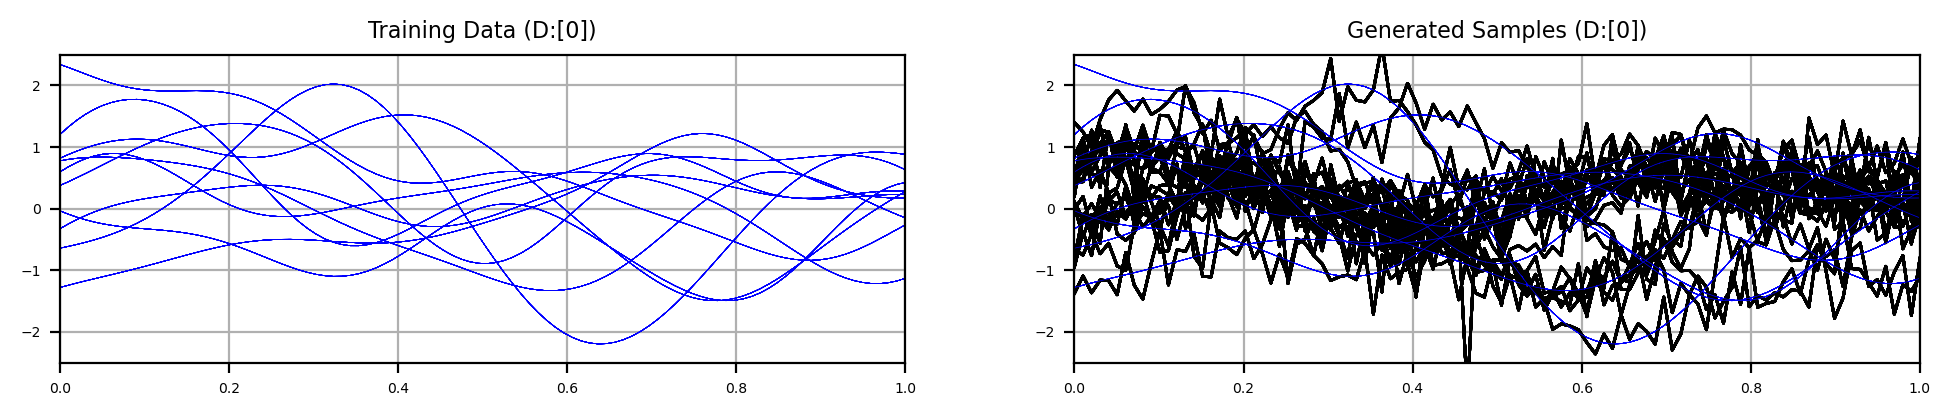

[12500/50000][25.00%] loss:[0.427]
  [l1]:[0.266]
  [l2]:[0.161]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[15000/50000][30.00%] loss:[0.470]
  [l1]:[0.282]
  [l2]:[0.188]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


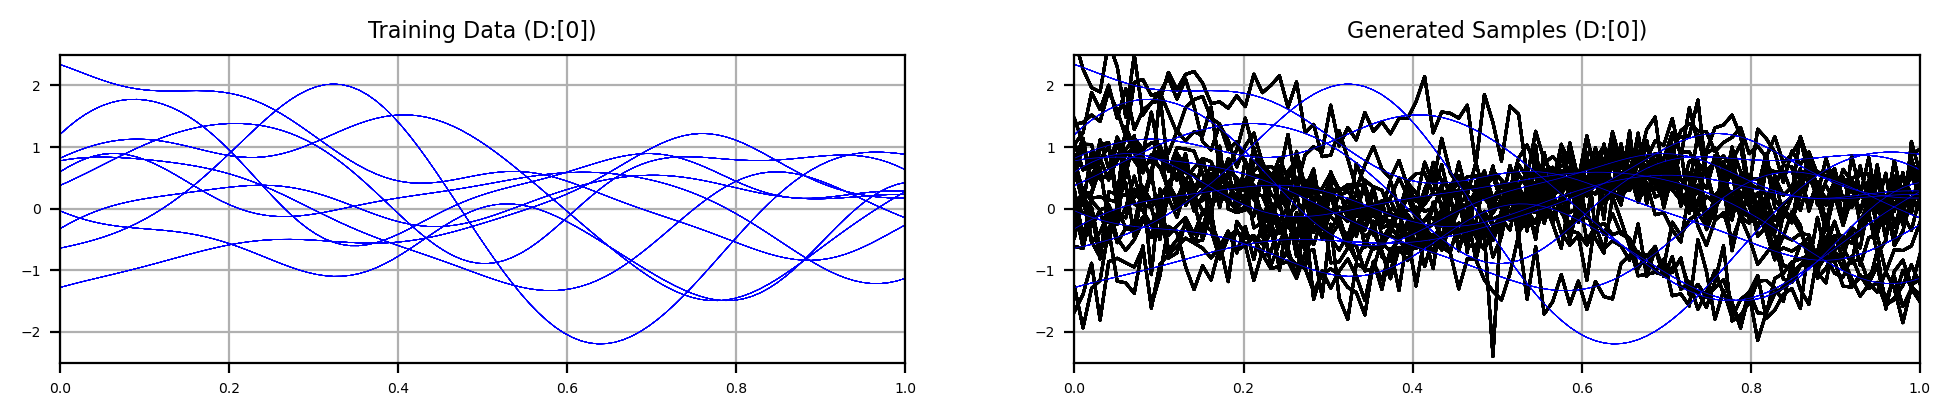

[17500/50000][35.00%] loss:[0.417]
  [l1]:[0.257]
  [l2]:[0.160]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[20000/50000][40.00%] loss:[0.531]
  [l1]:[0.316]
  [l2]:[0.215]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


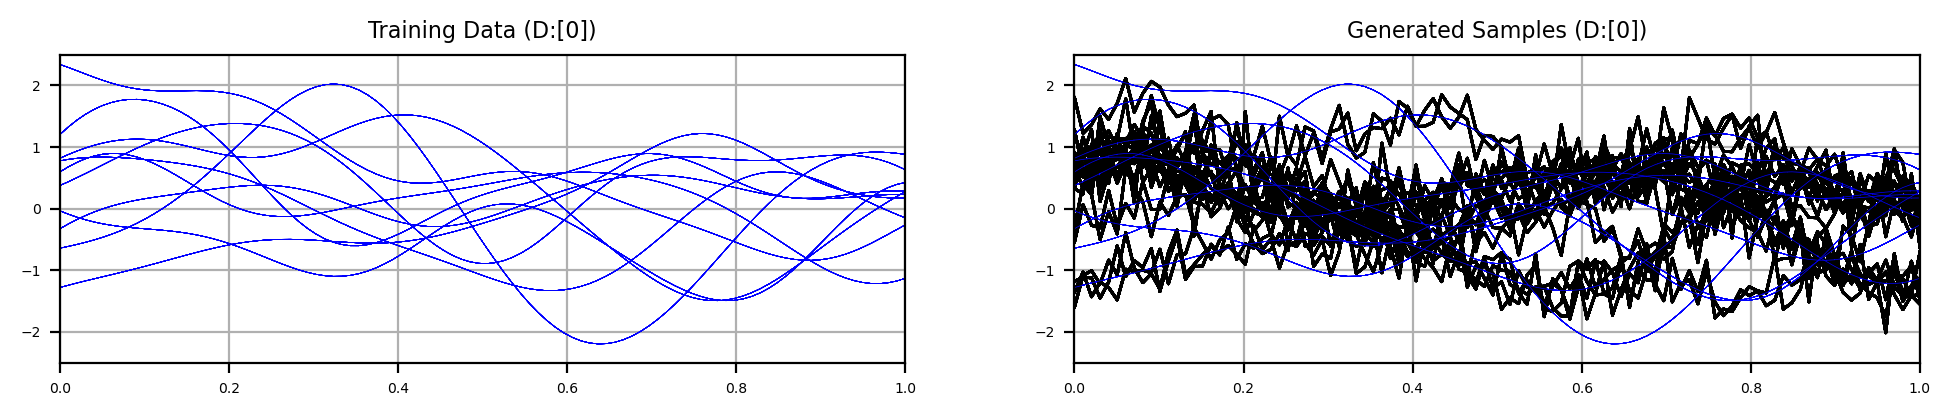

[22500/50000][45.00%] loss:[0.468]
  [l1]:[0.284]
  [l2]:[0.184]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[25000/50000][50.00%] loss:[0.417]
  [l1]:[0.264]
  [l2]:[0.153]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


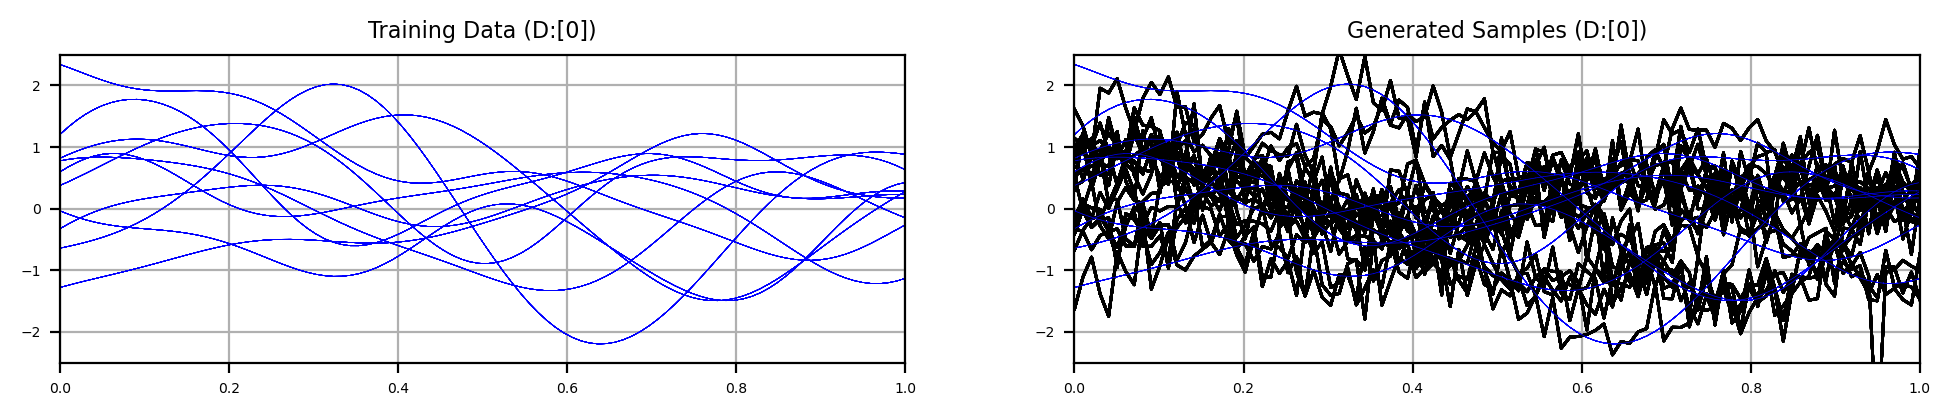

[27500/50000][55.00%] loss:[0.401]
  [l1]:[0.258]
  [l2]:[0.142]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[30000/50000][60.00%] loss:[0.433]
  [l1]:[0.268]
  [l2]:[0.165]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


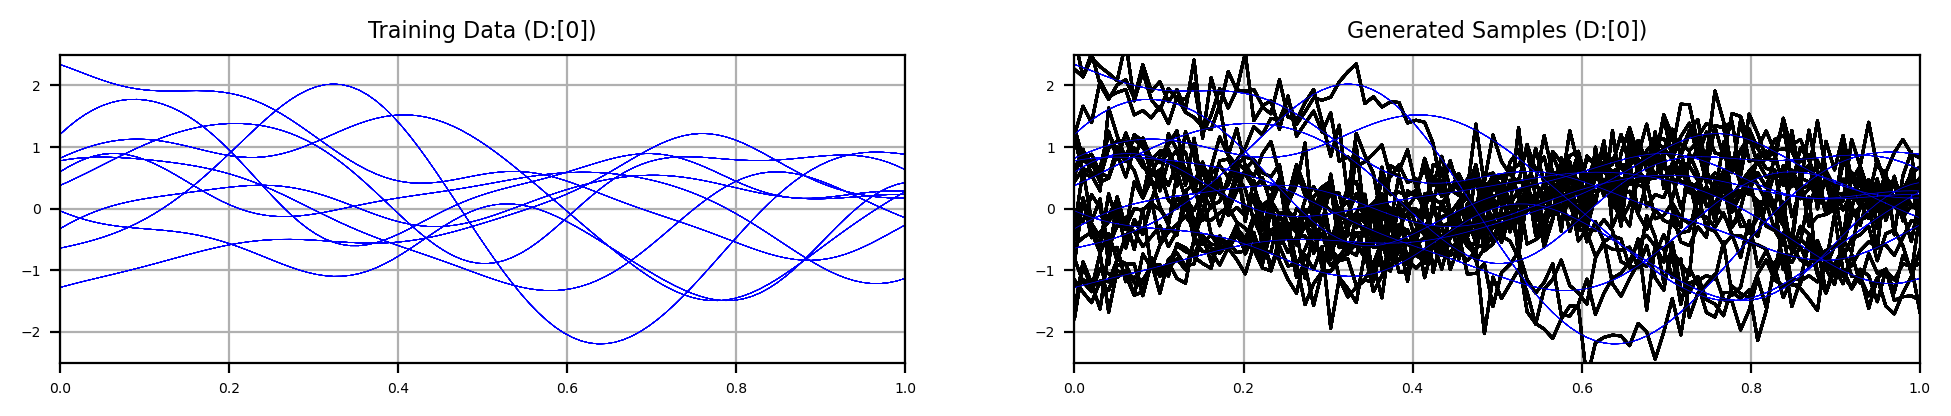

[32500/50000][65.00%] loss:[0.492]
  [l1]:[0.297]
  [l2]:[0.195]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[35000/50000][70.00%] loss:[0.477]
  [l1]:[0.286]
  [l2]:[0.190]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


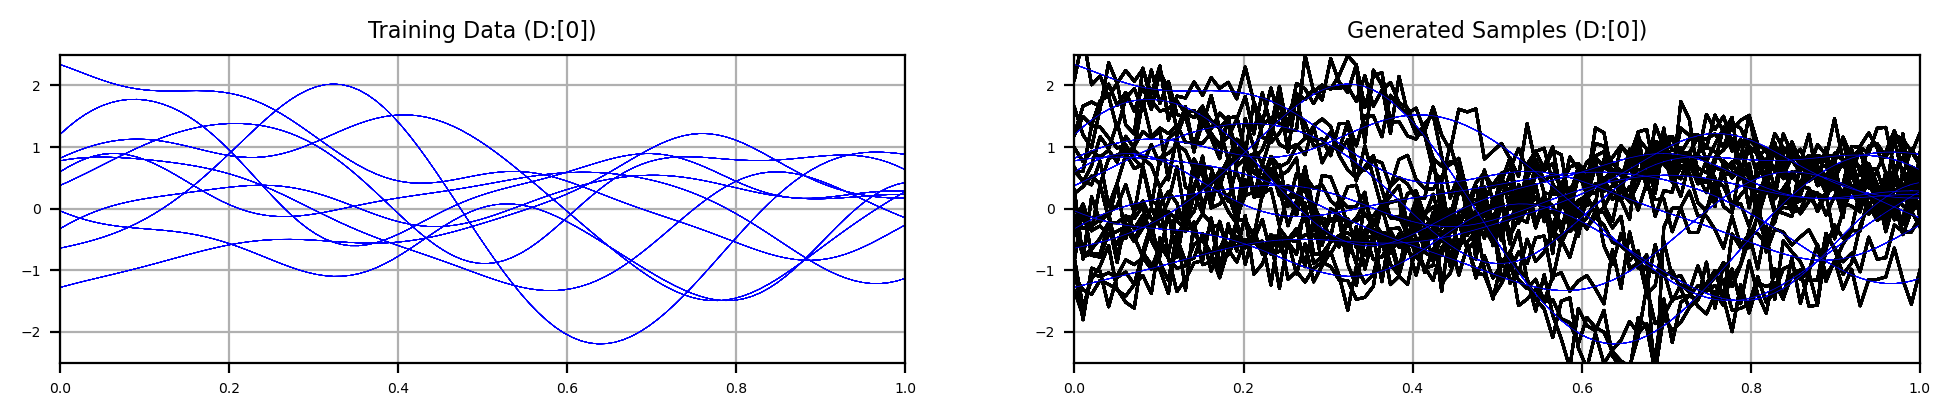

[37500/50000][75.00%] loss:[0.406]
  [l1]:[0.254]
  [l2]:[0.152]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[40000/50000][80.00%] loss:[0.438]
  [l1]:[0.270]
  [l2]:[0.168]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


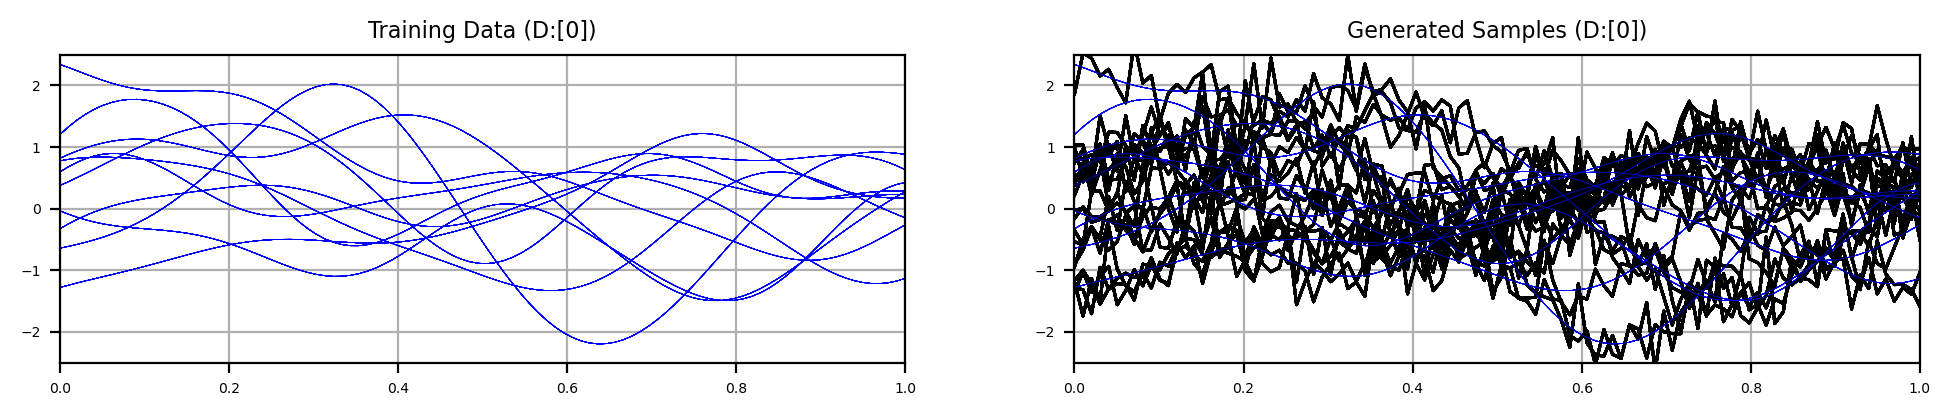

[42500/50000][85.00%] loss:[0.458]
  [l1]:[0.276]
  [l2]:[0.182]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[45000/50000][90.00%] loss:[0.473]
  [l1]:[0.289]
  [l2]:[0.184]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


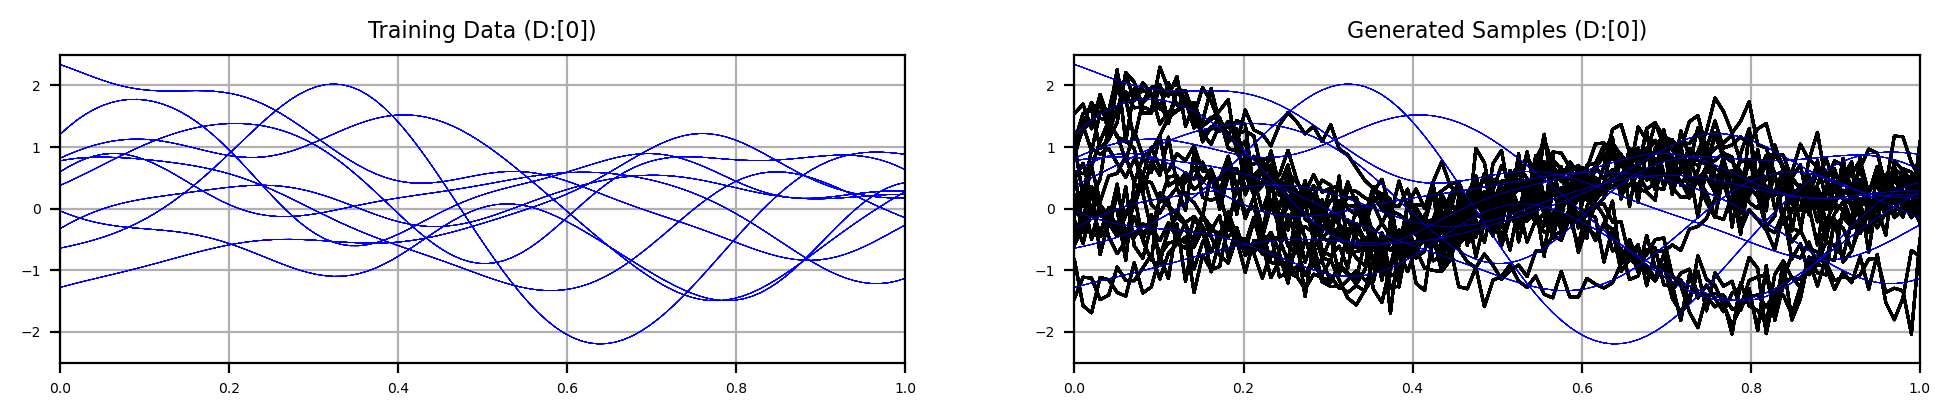

[47500/50000][95.00%] loss:[0.430]
  [l1]:[0.266]
  [l2]:[0.164]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[49999/50000][100.00%] loss:[0.436]
  [l1]:[0.271]
  [l2]:[0.165]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


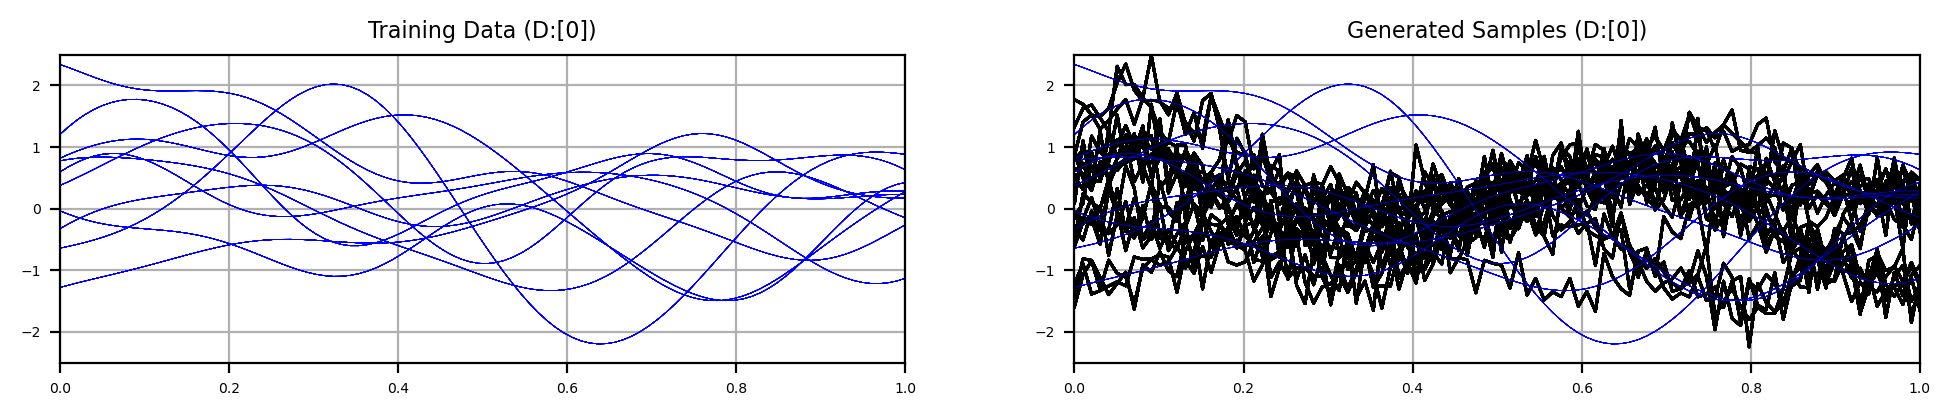

Done.


In [6]:
ddpm_train_wrapper(
    times,x_0,dc,actv=actv,
    hyp_len_forward=0.0,hyp_len_projection=0.0,hyp_sig2w=1e-6,
    n_sample=20,base_lr=base_lr,MAX_ITER=MAX_ITER,BATCH_SIZE=BATCH_SIZE,
    l1_w=l1_w,l2_w=l2_w,huber_w=huber_w,smt_l1_w=smt_l1_w,
    A=A,V=V,vel_w=0.0,acc_w=0.0,
    RKHS_PROJECTION_EACH_X_T=False,device='cpu')
print ("Done.")